# Visualization - exploring the data

Let's begin with the imports...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
import gensim
from wordcloud import WordCloud, STOPWORDS
# import tensorflow as tf
# from tensorflow.python.keras import models
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.layers import Dropout

from seinfeld_laugh_corpus import corpus
from seinfeld_playground import *

%load_ext autoreload
%autoreload 2

Load the corpus into a DataFrame, and create a separate DataFrame for the 4 main characters.

In [2]:
df = load_corpus()
df_main_characters = df[df['character'].isin(["JERRY", "ELAINE", "KRAMER", "GEORGE"])]

Let's see how each entry in our DataFrame looks like...

In [3]:
df.head(1)

character 
 txt 
 num_words 
 start 
 end 
 length 
 is_funny 
 laugh_time 
 episode_num 
 line_num 
 episode_name 
 season 
 total_lines 
 global_episode_num 
 
 
 
 
 0 
 JERRY 
 Here's what happened last week, incase you mi... 
 9 
 1.106 
 3.05 
 1.944 
 True 
 3.6 
 6 
 0 
 The Watch 
 4 
 486 
 1

## Analyze the sentences' length, both in time (seconds) and in #words.
Split for each character and for funny/not-funny sentences.  
Are funny sentences longer then not-funny ones?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


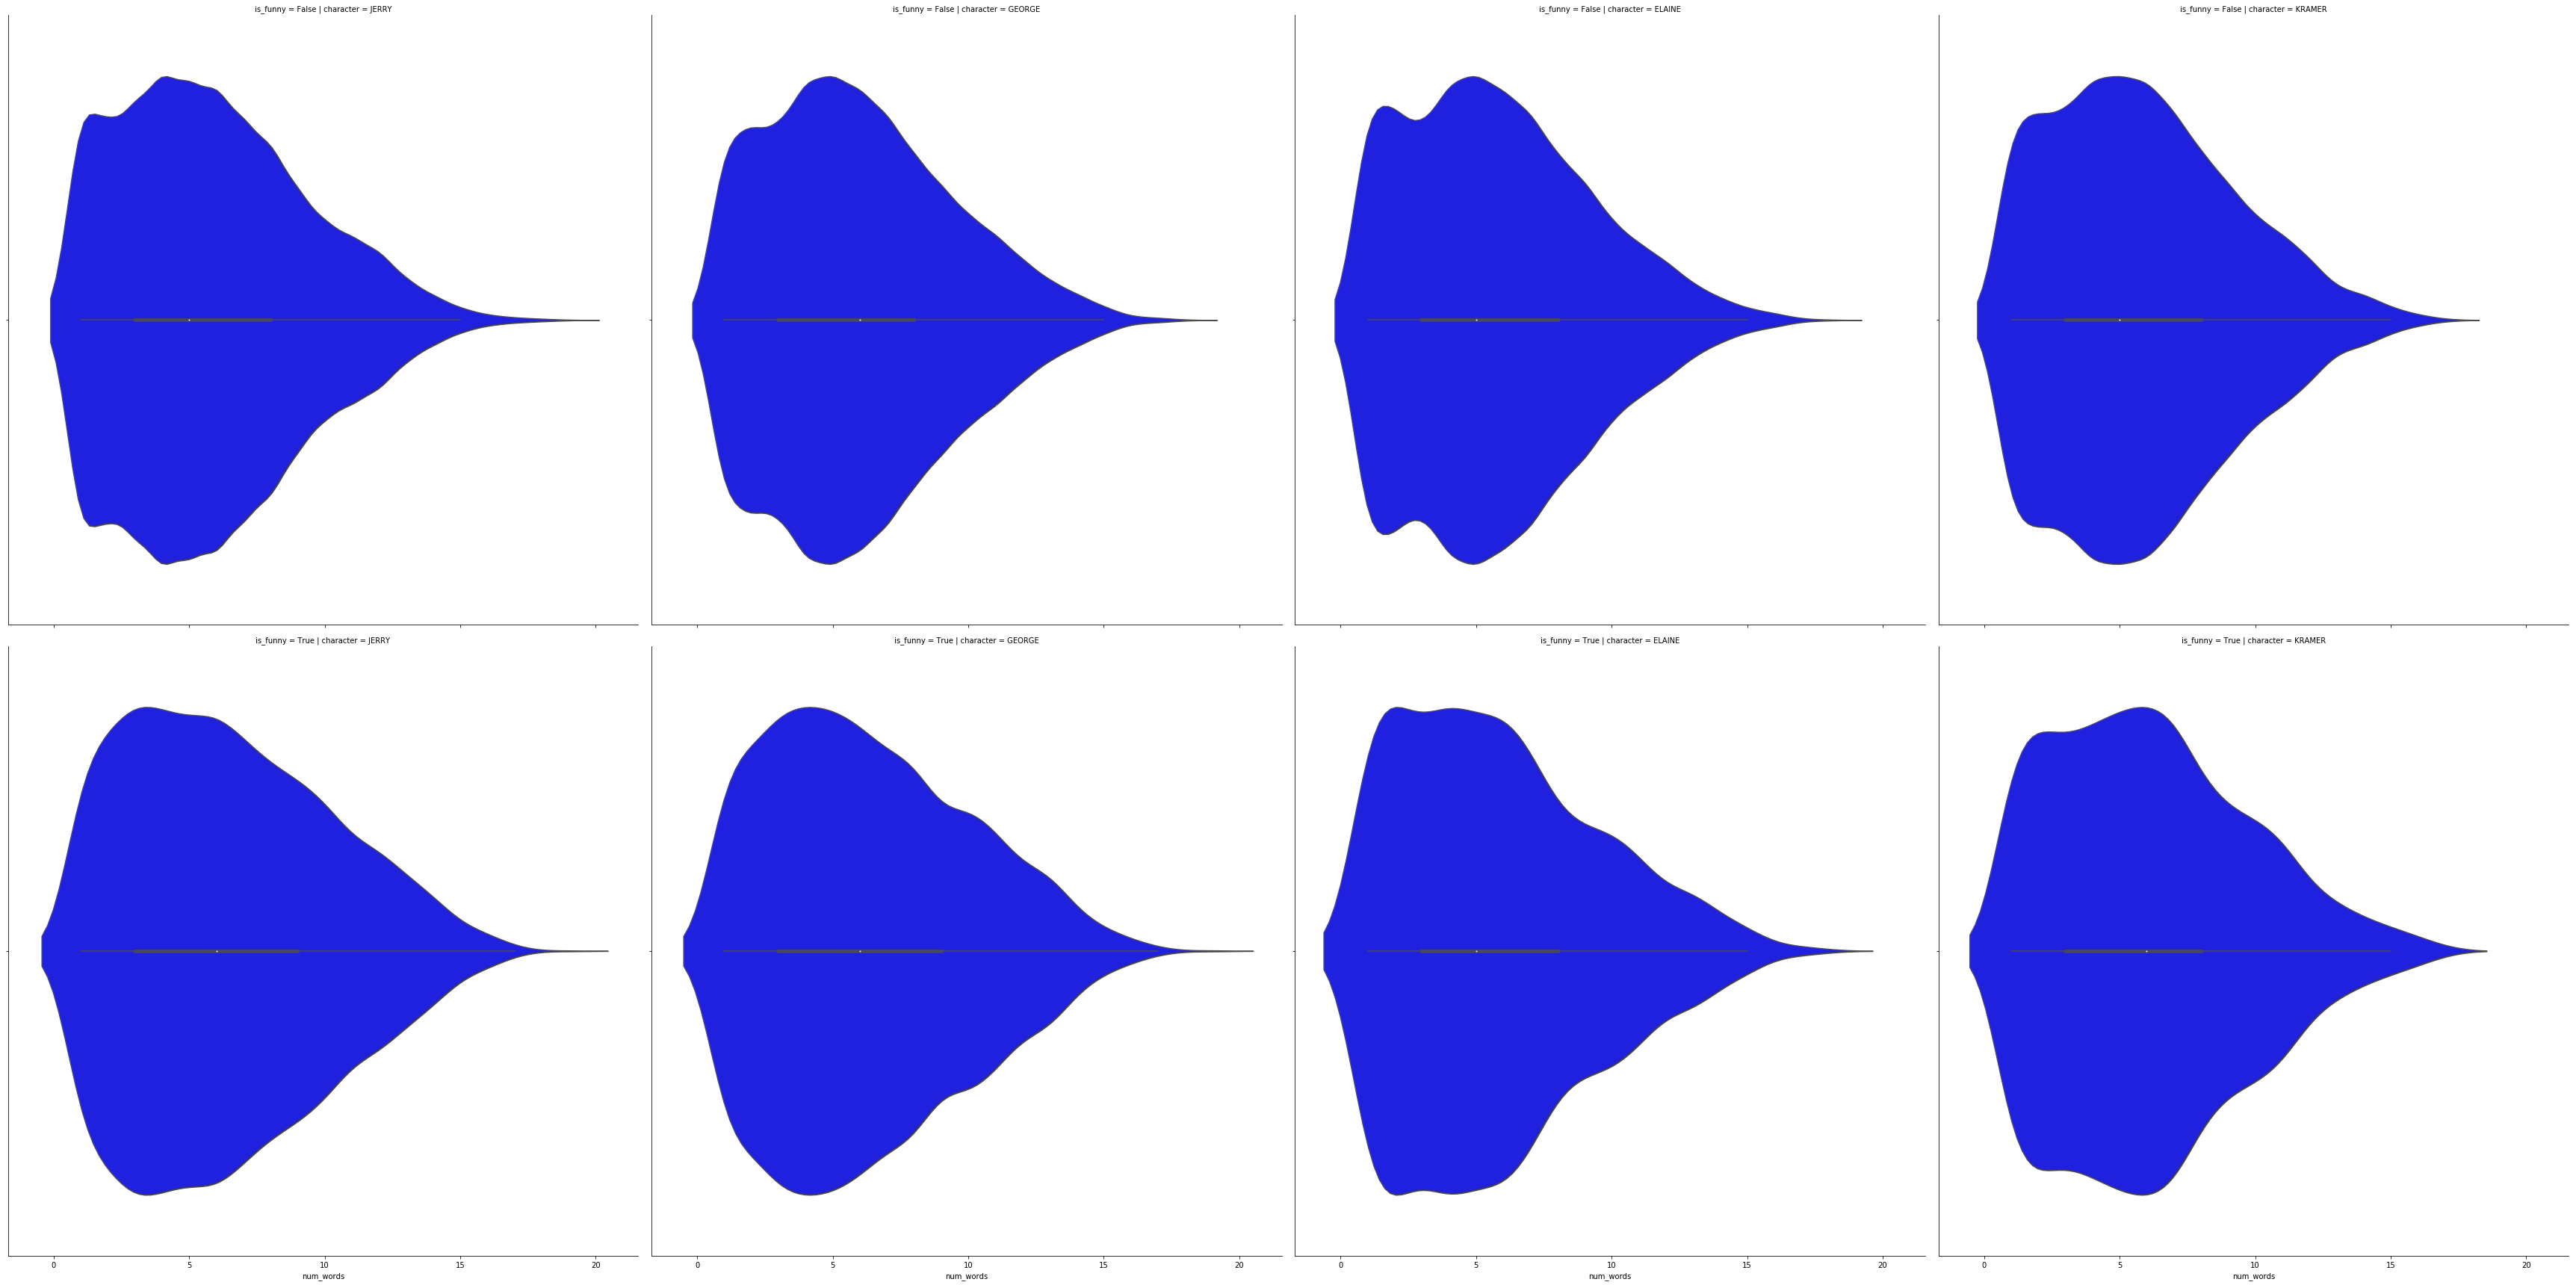

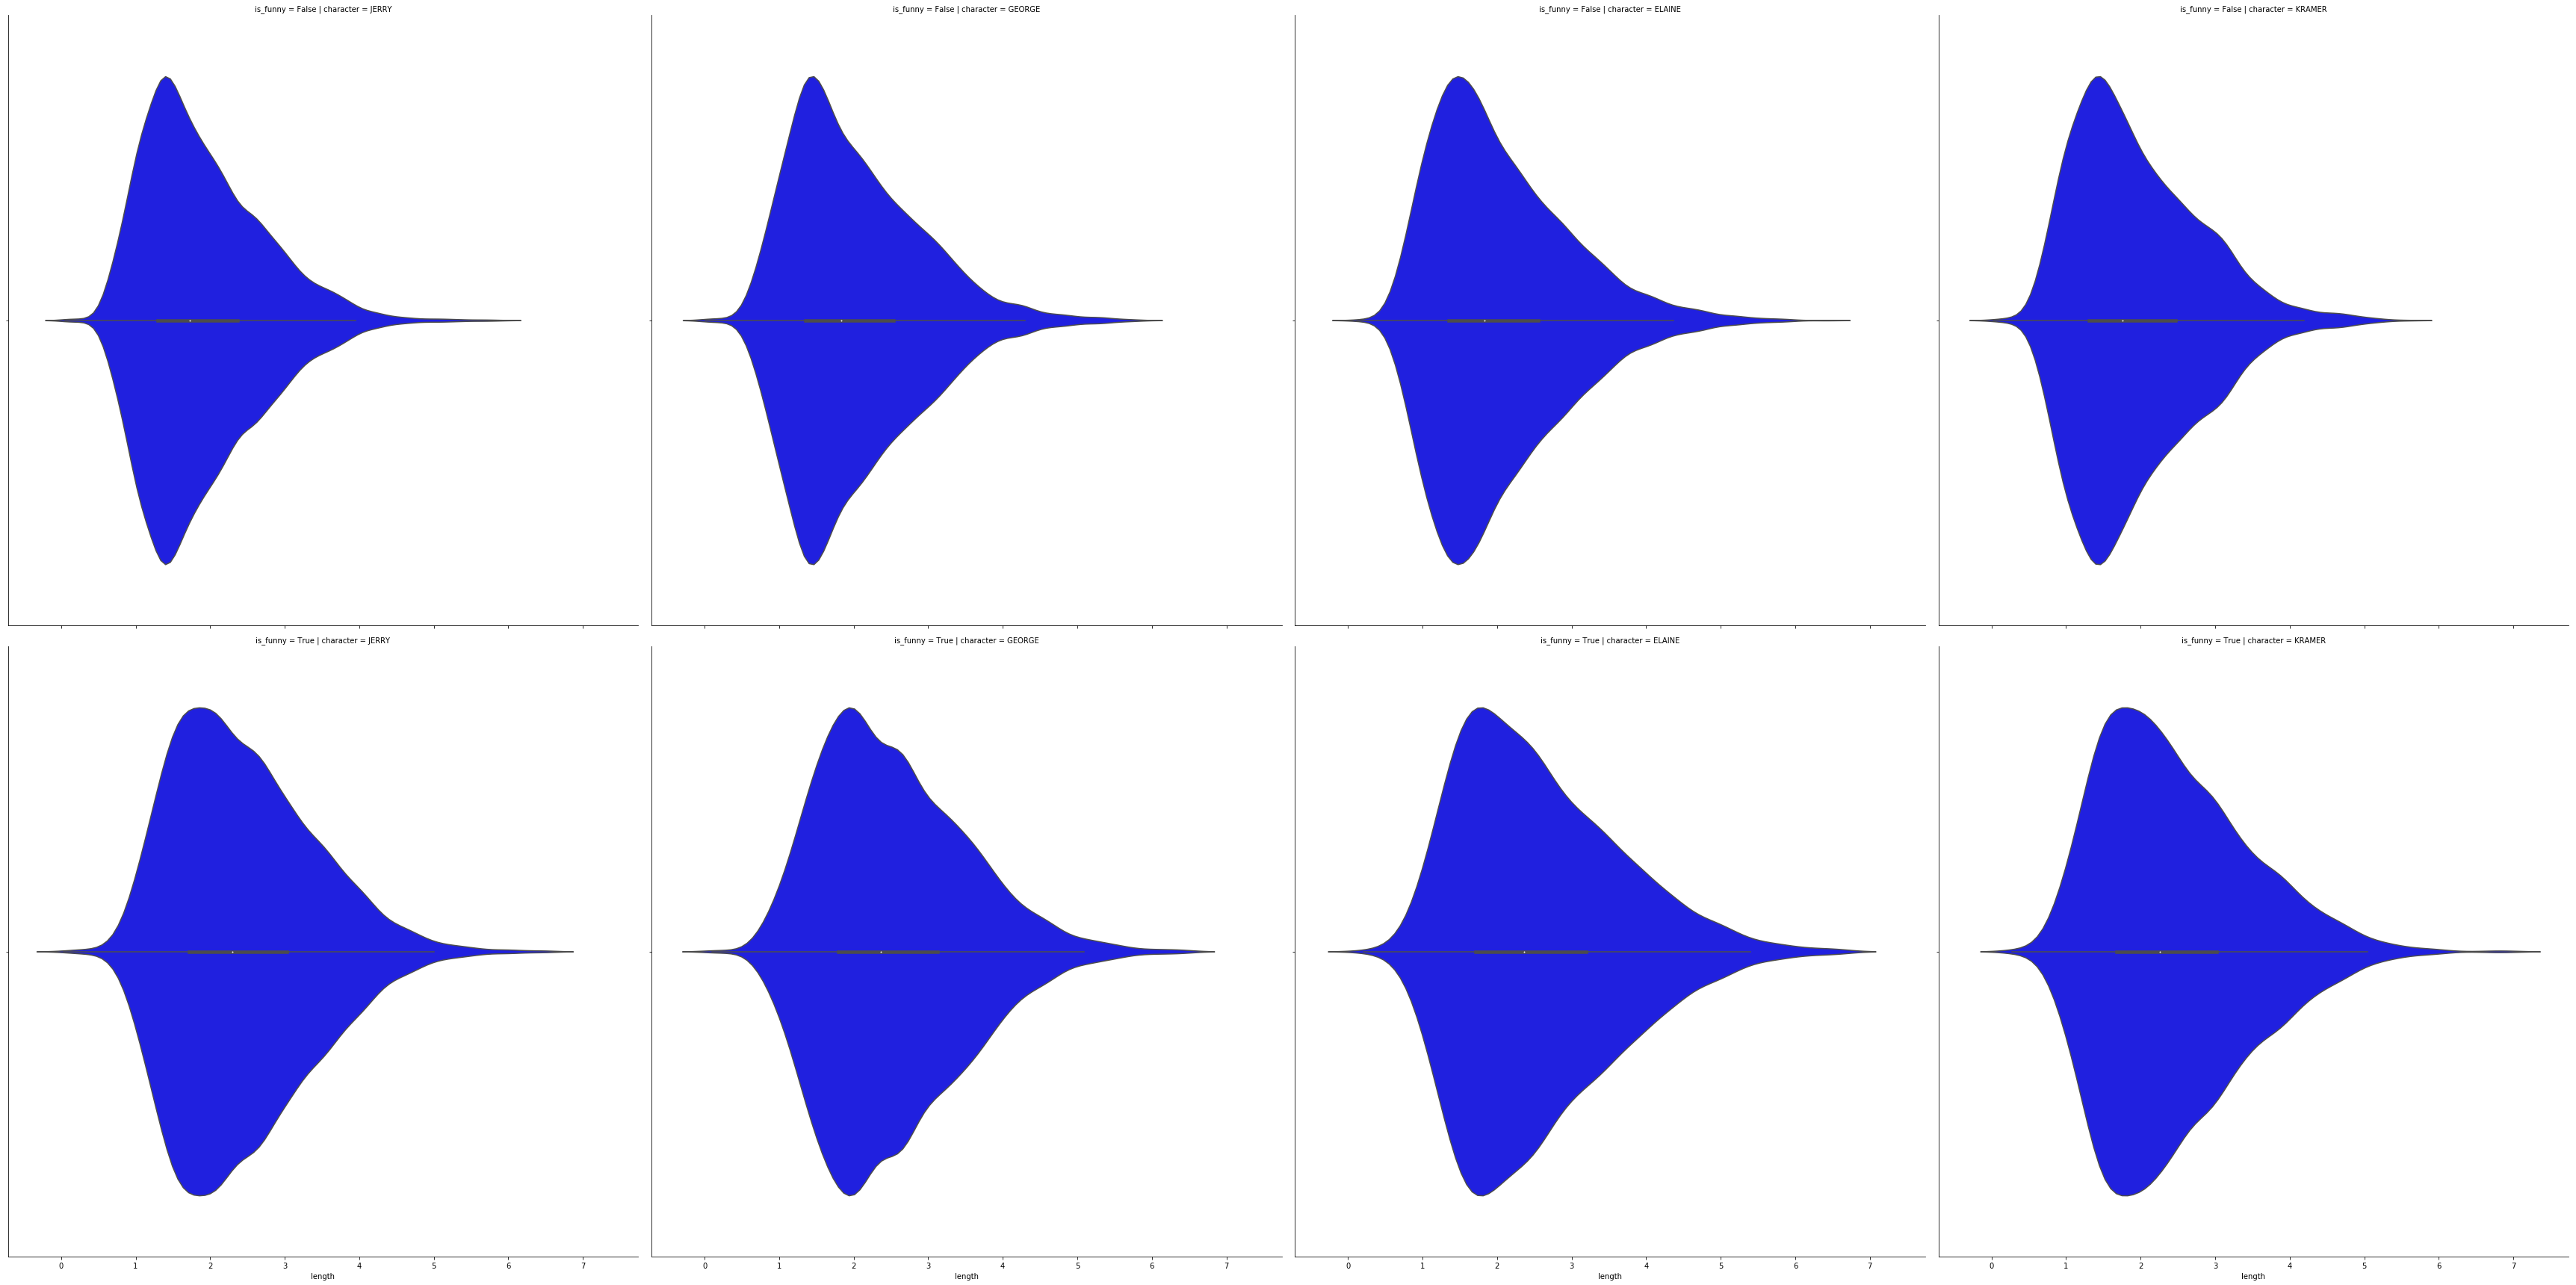

In [4]:
def plot_per_character_cross_is_funny(df, colname):
    g = sns.FacetGrid(df, col='character', row='is_funny', height=12, sharex=True, sharey=True)
    g.map(sns.violinplot, colname, bins=50, color='b')
    plt.show()

plot_per_character_cross_is_funny(df_main_characters, "num_words")   # Sentence's length in #words
plot_per_character_cross_is_funny(df_main_characters, "length")      # Sentence's length in seconds

We can see that the distributions of the lengthes are slightly different between funny and not-funny sentences.  
It seems that funny sentences have "bigger tail".  
However, it's not obvious that this is significant.  
Let's try to see it numerically...

In [5]:
df_main_characters.groupby(["character", "is_funny"]).describe()['num_words']

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 character 
 is_funny 
 
 
 
 
 
 
 
 
 
 
 
 
 ELAINE 
 False 
 5181.0 
 5.734221 
 3.374988 
 1.0 
 3.0 
 5.0 
 8.0 
 18.0 
 
 
 True 
 1763.0 
 5.785593 
 3.632130 
 1.0 
 3.0 
 5.0 
 8.0 
 18.0 
 
 
 GEORGE 
 False 
 6093.0 
 5.913836 
 3.369355 
 1.0 
 3.0 
 6.0 
 8.0 
 18.0 
 
 
 True 
 2703.0 
 6.295228 
 3.667046 
 1.0 
 3.0 
 6.0 
 9.0 
 19.0 
 
 
 JERRY 
 False 
 8357.0 
 5.802800 
 3.422097 
 1.0 
 3.0 
 5.0 
 8.0 
 19.0 
 
 
 True 
 3659.0 
 6.411588 
 3.731420 
 1.0 
 3.0 
 6.0 
 9.0 
 19.0 
 
 
 KRAMER 
 False 
 4318.0 
 5.800602 
 3.355106 
 1.0 
 3.0 
 5.0 
 8.0 
 17.0 
 
 
 True 
 2177.0 
 6.083142 
 3.576883 
 1.0 
 3.0 
 6.0 
 8.0 
 17.0

In [6]:
df_main_characters.groupby(["character", "is_funny"]).describe()['length']

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 character 
 is_funny 
 
 
 
 
 
 
 
 
 
 
 
 
 ELAINE 
 False 
 5181.0 
 2.029553 
 0.908123 
 0.116 
 1.347 
 1.829 
 2.555 
 6.403 
 
 
 True 
 1763.0 
 2.541912 
 1.066384 
 0.210 
 1.708 
 2.364 
 3.194 
 6.597 
 
 
 GEORGE 
 False 
 6093.0 
 2.006164 
 0.869716 
 0.014 
 1.348 
 1.829 
 2.534 
 5.834 
 
 
 True 
 2703.0 
 2.517910 
 0.968263 
 0.100 
 1.795 
 2.367 
 3.126 
 6.437 
 
 
 JERRY 
 False 
 8357.0 
 1.890218 
 0.798056 
 0.049 
 1.300 
 1.727 
 2.364 
 5.902 
 
 
 True 
 3659.0 
 2.426743 
 0.932661 
 0.034 
 1.716 
 2.295 
 3.034 
 6.505 
 
 
 KRAMER 
 False 
 4318.0 
 1.933257 
 0.840627 
 0.019 
 1.305 
 1.761 
 2.466 
 5.587 
 
 
 True 
 2177.0 
 2.437329 
 0.984176 
 0.274 
 1.676 
 2.261 
 3.023 
 6.934

We can see that the numbers are indeed slightly lower for not-funny sentences.  
But the large standard deviation makes it not significant, so we can not really separate funniness by length (somewhat obvious).

## Word Clouds
First we split by character and see its word-cloud.  
We try to see the petterns of words chosen by each character.  
Are there words that characterize each one?

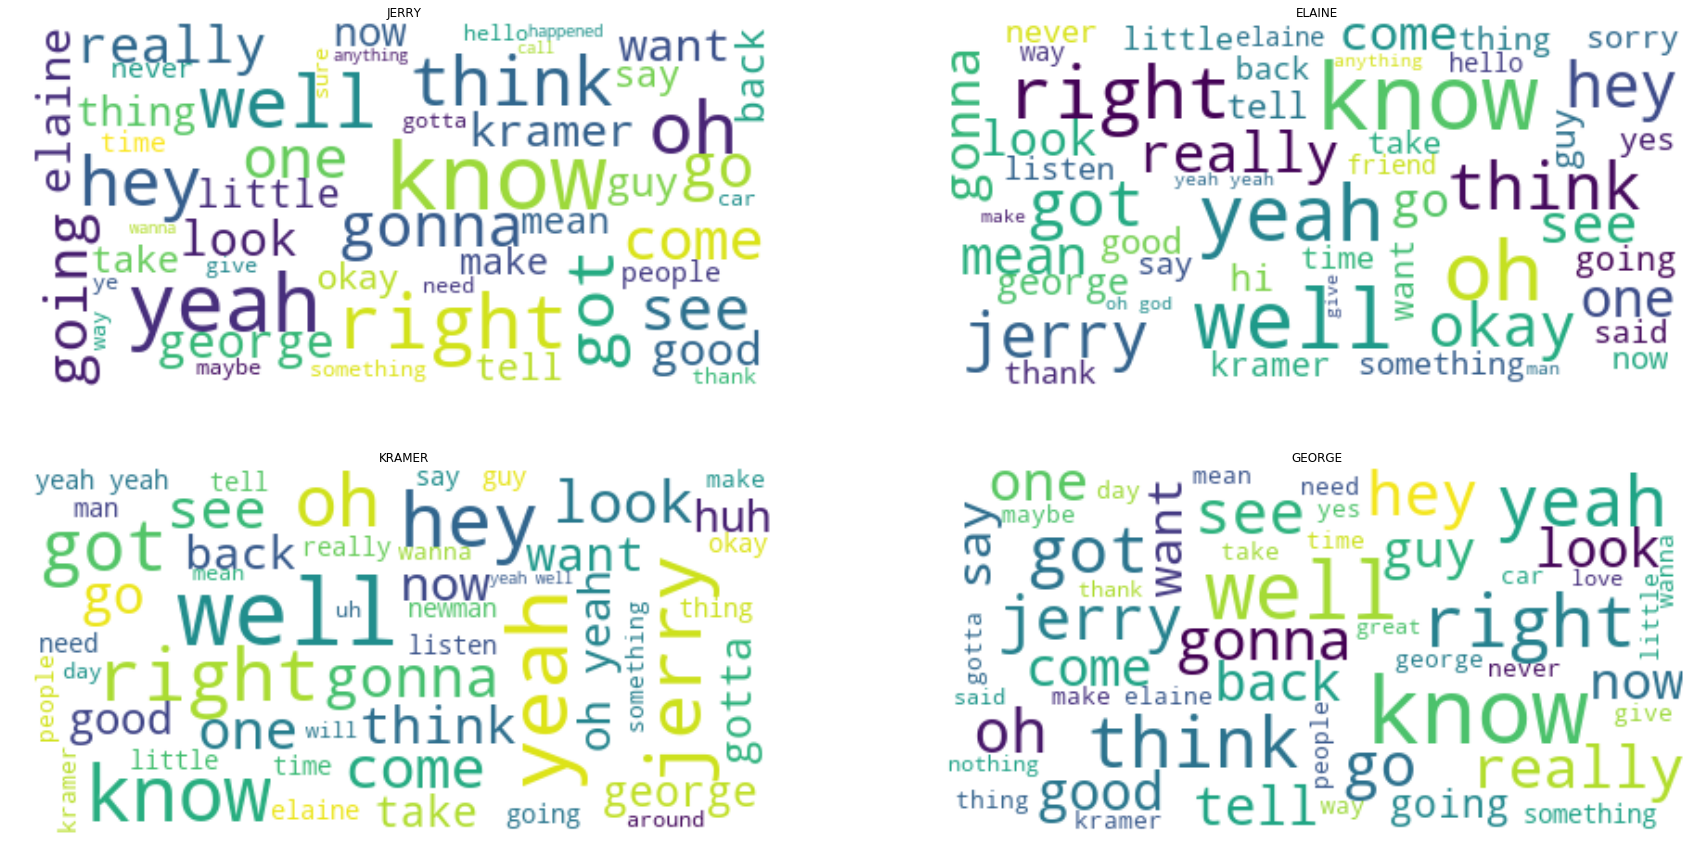

In [7]:
plt.figure(figsize=(30, 15))

for i, character in enumerate(["JERRY", "ELAINE", "KRAMER", "GEORGE"]):
    character_df = df[df['character'] == character]
    character_text = " ".join(character_df.txt).lower()
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(character_text)
    
    plt.subplot(2, 2, i+1)
    plt.title(character)
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
              
plt.show()

We can see that the most common words (bigger words in the word-cloud) are common between the characters.  
Indeed, they are general words in english that everyone use, such as 'know', 'yeah', 'right', etc...  
  
Let's try to see if we can see different patterns in the word-clouds of funny/not-funny sentences.

Jerry's word-cloud:


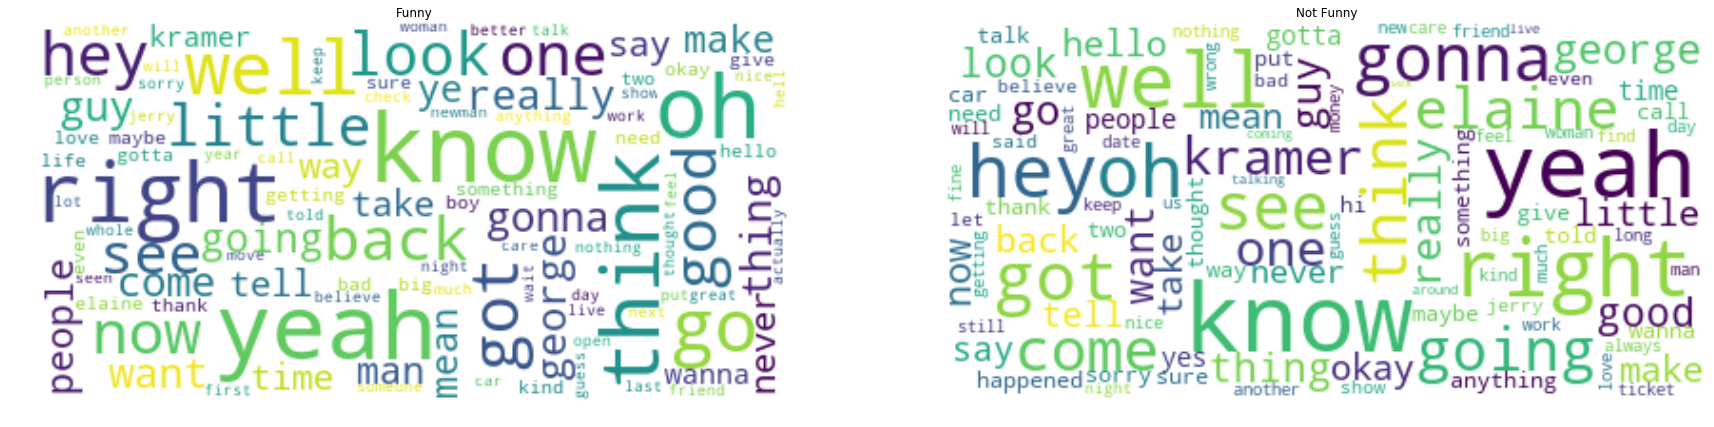

Elaine's word-cloud:


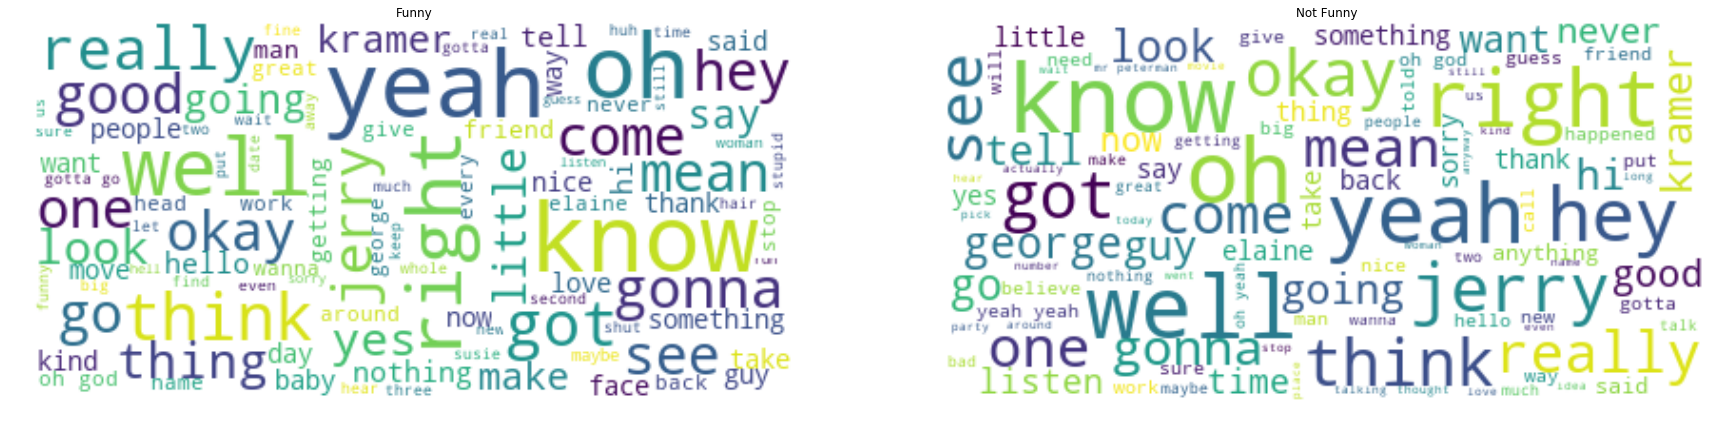

Kramer's word-cloud:


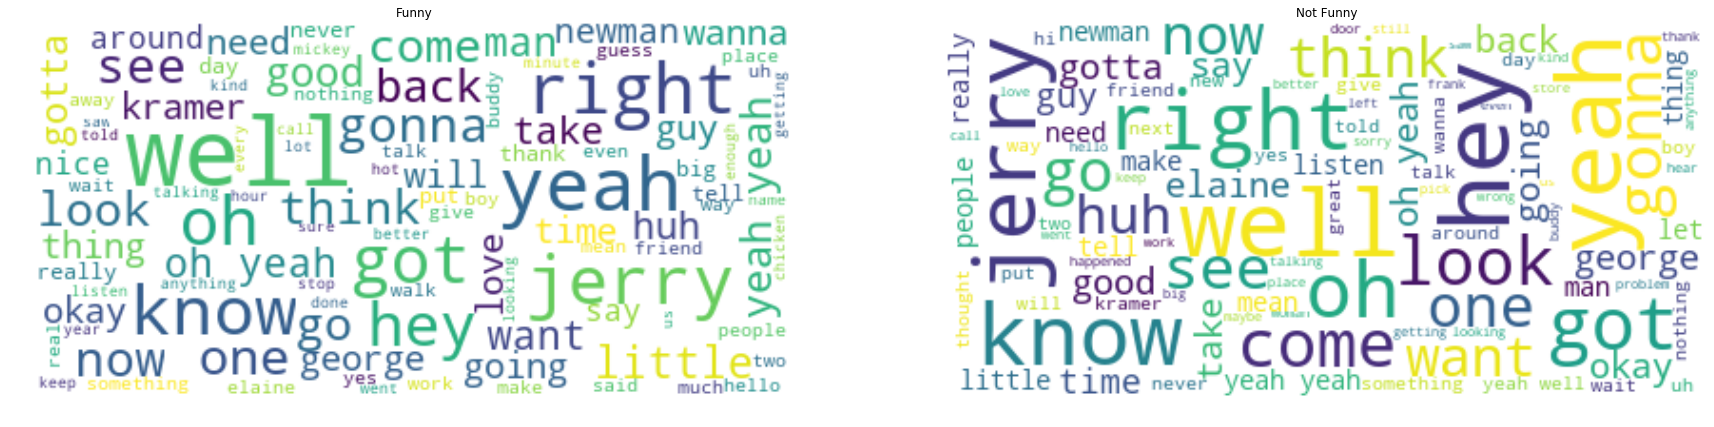

George's word-cloud:


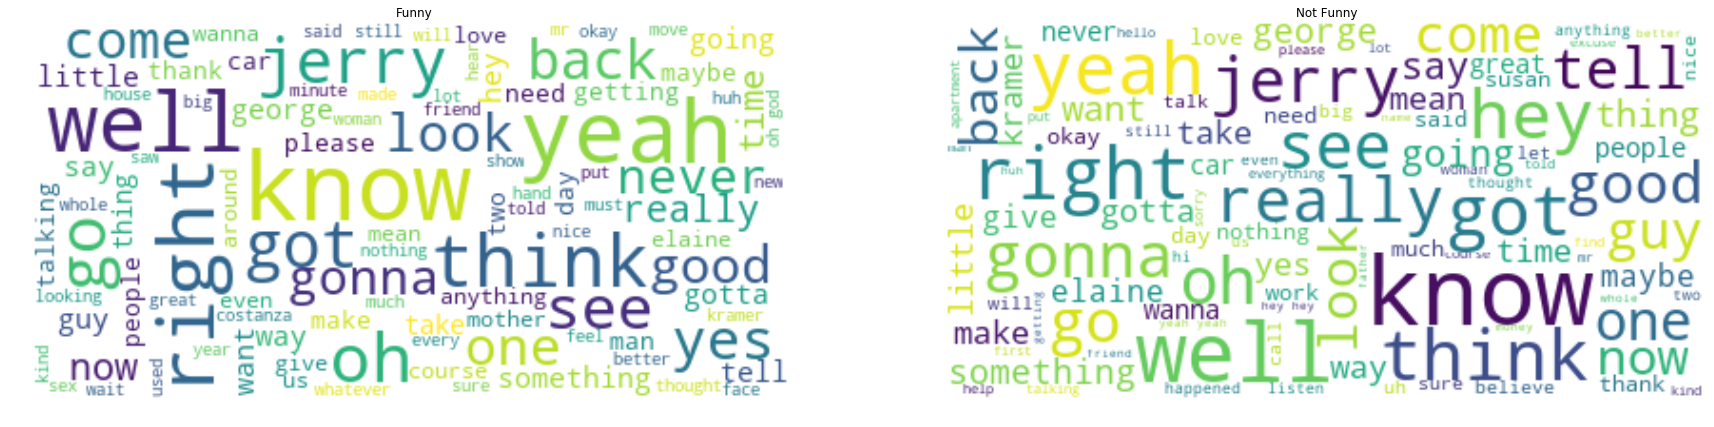

In [8]:
def plot_wordcloud(df, character):
    """
    Plot word-cloud for the given character
    """
    character_df = df[df['character'] == character]
    
    character_funny_text = " ".join(character_df[character_df['is_funny'] == True].txt).lower()
    character_not_funny_text = " ".join(character_df[character_df['is_funny'] == False].txt).lower()
    
    wordcloud_funny = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(character_funny_text)
    wordcloud_not_funny = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(character_not_funny_text)
    
    plt.figure(figsize=(30, 30))
    plt.subplot(121)
    plt.title("Funny")
    plt.axis("off")
    plt.imshow(wordcloud_funny, interpolation="bilinear")
    plt.subplot(122)
    plt.title("Not Funny")
    plt.axis("off")
    plt.imshow(wordcloud_not_funny, interpolation="bilinear")
    plt.show()

print("Jerry's word-cloud:")
plot_wordcloud(df, "JERRY")
print("Elaine's word-cloud:")
plot_wordcloud(df, "ELAINE")
print("Kramer's word-cloud:")
plot_wordcloud(df, "KRAMER")
print("George's word-cloud:")
plot_wordcloud(df, "GEORGE")

These word-clouds are just fun to look at...
We can see that there are many common frequent words between funny/not-funny sentences.  
However, we can see some interesting issues.  
For example, in Jerry's not-funny sentences the word 'Elaine' is more common. Can we learn that when Jerry says 'Elaine' in a sentence it is less likely to be funny?